## Vanilla Hierarchical Clustering Example

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

X1 = np.array([[1,1], [3,2], [9,1], [3,7], [7,2], [9,7], [4,8], [8,3],[1,4]])
print(X1)

[[1 1]
 [3 2]
 [9 1]
 [3 7]
 [7 2]
 [9 7]
 [4 8]
 [8 3]
 [1 4]]


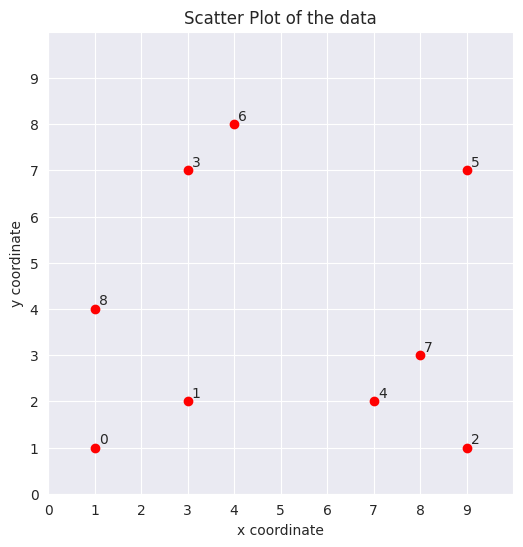

In [4]:
plt.figure(figsize=(6, 6))

plt.scatter(X1[:,0], X1[:,1], c='r')

# Create numbered labels for each point
for i in range(X1.shape[0]):
    plt.annotate(str(i), xy=(X1[i,0], X1[i,1]), xytext=(3, 3), textcoords='offset points')
    
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Scatter Plot of the data')
plt.xlim([0,10]), plt.ylim([0,10])
plt.xticks(range(10)), plt.yticks(range(10))
plt.grid()

plt.show()

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z1 = linkage(X1, method='single', metric='euclidean')
Z2 = linkage(X1, method='complete', metric='euclidean')
Z3 = linkage(X1, method='average', metric='euclidean')
Z4 = linkage(X1, method='ward', metric='euclidean')

In [7]:
print(Z4)

[[ 4.          7.          1.41421356  2.        ]
 [ 3.          6.          1.41421356  2.        ]
 [ 0.          1.          2.23606798  2.        ]
 [ 2.          9.          2.44948974  3.        ]
 [ 8.         11.          3.10912635  3.        ]
 [ 5.         12.          6.244998    4.        ]
 [10.         13.          8.49313448  5.        ]
 [14.         15.         12.56892111  9.        ]]


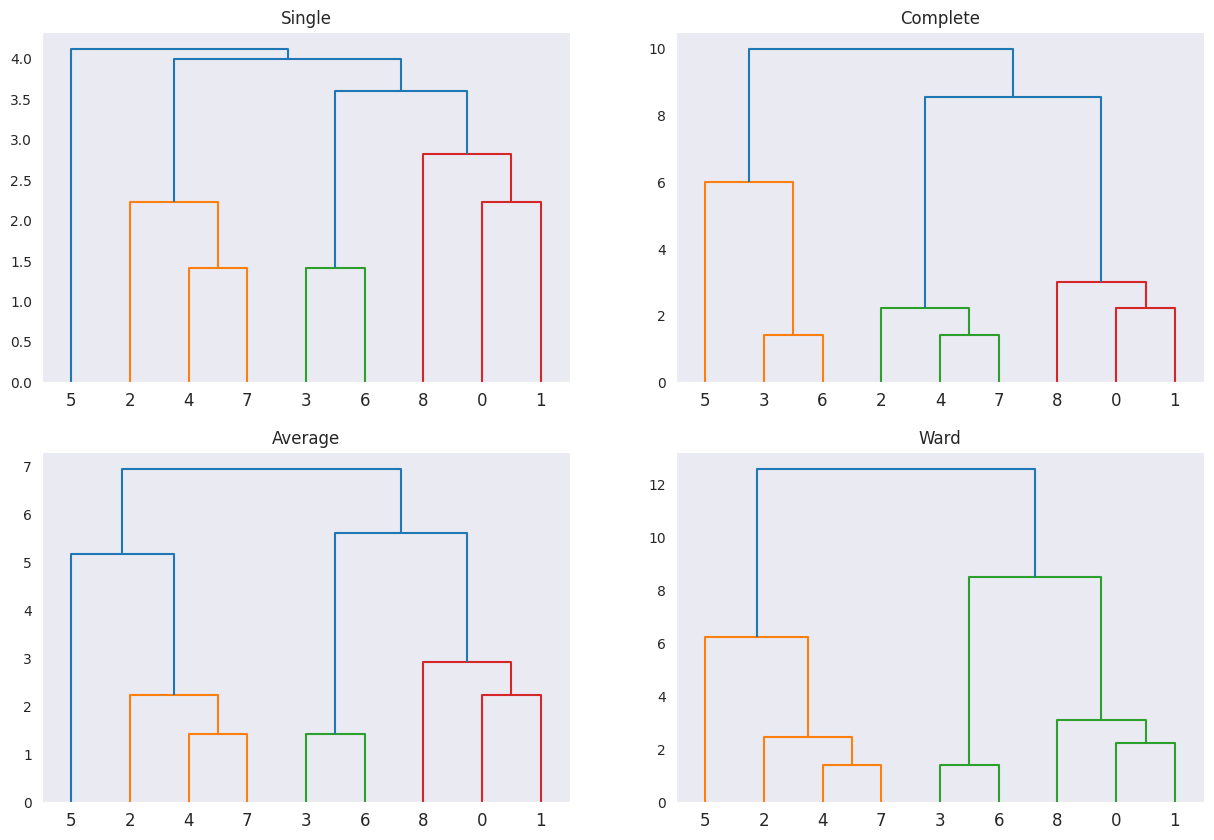

In [6]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

### Pre-processing for the RF input based on att_mat

In [1]:
import torch
import numpy as np
from sklearn.cluster import KMeans

# Assuming you have an attention matrix of size (100, 100)
attention_matrix = torch.rand((100, 100))

# Reshape the attention matrix to a 1D tensor
attention_vector = attention_matrix.view(-1)

print(attention_vector.shape)

# Number of clusters and size of each cluster
num_clusters = 10
cluster_size = 25

# Use K-Means for clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(attention_vector.view(-1, 1))

# Convert cluster assignments to PyTorch tensor
cluster_assignments = torch.from_numpy(kmeans.labels_)

# Create clusters based on assignments
clusters = [torch.nonzero(cluster_assignments == i).view(-1) for i in range(num_clusters)]

# Select the top frames from each cluster
selected_frames = [cluster[:cluster_size] for cluster in clusters]

# Print the selected frames for each cluster
for i, selected_frame_indices in enumerate(selected_frames):
    print(f"Cluster {i + 1} - Selected Frames: {selected_frame_indices}")

# If you want the actual attention values for the selected frames, you can extract them from the attention matrix
selected_attention_values = [attention_matrix[frame_indices] for frame_indices in selected_frames]


torch.Size([10000])
Cluster 1 - Selected Frames: tensor([ 10,  19,  21,  25,  37,  43,  53,  60,  82,  87,  96, 119, 125, 133,
        142, 159, 188, 191, 203, 207, 217, 223, 224, 231, 241])
Cluster 2 - Selected Frames: tensor([  1,   5,   7,  27,  54,  67, 110, 122, 127, 151, 189, 197, 211, 220,
        226, 228, 232, 261, 266, 267, 271, 272, 295, 296, 299])
Cluster 3 - Selected Frames: tensor([ 22,  39,  41,  47,  77,  85, 100, 107, 118, 137, 154, 161, 167, 169,
        221, 230, 235, 240, 262, 274, 286, 288, 298, 305, 307])
Cluster 4 - Selected Frames: tensor([  0,  16,  23,  26,  28,  34,  46,  50,  55,  56,  62,  90, 114, 117,
        120, 131, 140, 165, 171, 176, 194, 199, 202, 209, 213])
Cluster 5 - Selected Frames: tensor([  2,   4,  15,  31,  33,  42,  72,  80,  92,  95, 106, 113, 115, 135,
        141, 147, 160, 163, 182, 198, 208, 244, 254, 256, 265])
Cluster 6 - Selected Frames: tensor([ 12,  17,  40,  49,  66,  68,  78,  79,  84,  91,  93,  97,  99, 108,
        126, 132, 

/home/cao/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


IndexError: index 119 is out of bounds for dimension 0 with size 100

In [ ]:
import torch
from scipy.cluster.hierarchy import linkage, fcluster

# Assuming you have an attention matrix of size (100, 100)
attention_matrix = torch.rand((100, 100))

# Convert attention matrix to a NumPy array
attention_matrix_np = attention_matrix.numpy()

# Apply hierarchical clustering
Z = linkage(attention_matrix_np, method='average')

# Set a threshold to form clusters
threshold = 0.8  # Adjust this threshold based on your data

# Form clusters based on the threshold
clusters = fcluster(Z, t=threshold, criterion='distance')

# Number of clusters and size of each cluster
num_clusters = 10
cluster_size = 25

# Create a dictionary to store frame indices for each cluster
cluster_dict = {i: [] for i in range(1, num_clusters + 1)}

# Assign frames to clusters based on the hierarchical clustering results
print(clusters)
for i, cluster_id in enumerate(clusters):
    cluster_dict[cluster_id].append(i)
# Select the top frames from each cluster
selected_frames = [cluster[:cluster_size] for cluster in cluster_dict.values()]

# Print the selected frames for each cluster
for i, selected_frame_indices in enumerate(selected_frames):
    print(f"Cluster {i + 1} - Selected Frames: {selected_frame_indices}")

# If you want the actual attention values for the selected frames, you can extract them from the attention matrix
selected_attention_values = [attention_matrix[frame_indices] for frame_indices in selected_frames]


[  6  34  24  86  54  77  69  52   3  90  58  49  46  88  51  10  25  99
  64  19  95   4   9  39  66  41  97  87  11  92  61  16  55  63  59  71
  44  31  22  21  13  15  20  26  38  70  82  75  27  29  83  14   5  47
  17  32  60  35  80  43  56  36  33  94  18  45  76  62  89  23  67  42
 100  40  12  78  57  91  48  73   1  96  93  79  53  28  98  68  81  37
   2  30  74  84  50   7  65   8  72  85]


KeyError: 34